In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [5]:
X

array([[ 0.97078604,  9.60366964],
       [-6.81548901,  0.51366228],
       [ 2.07406526,  8.85067538],
       ...,
       [-5.98423024, -0.7021099 ],
       [-7.6205869 ,  0.95699412],
       [-6.27711719,  1.27119263]], shape=(1000, 2))

In [6]:
y

array([2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1,
       1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2,
       2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       0, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0,
       0, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1,
       2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0,
       0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1,
       1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0,

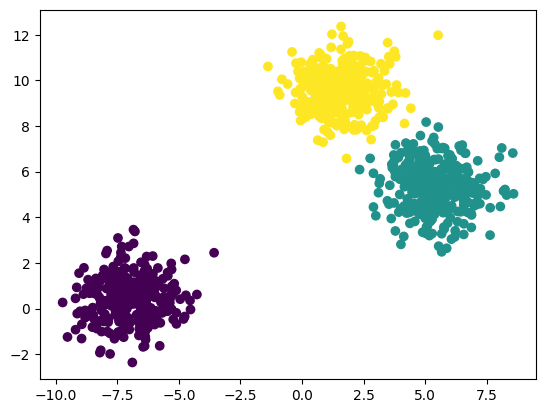

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
from sklearn.cluster import KMeans

In [13]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[1339.9999999999998,
 259.03306346271586,
 66.73346884522931,
 57.7947070460535,
 47.4192670564172,
 45.95549233696446,
 36.997530631559044,
 32.00860193271415,
 31.521418088874363,
 26.765288281842807]

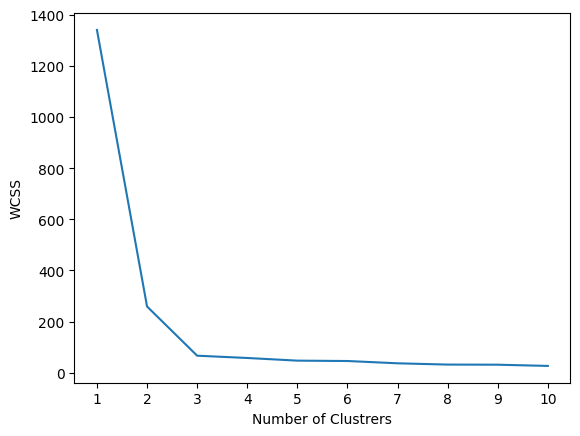

In [15]:
## plot elbow curve
plt.Figure(figsize=(100,90))
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [17]:
kmeans.fit_predict(X_train_scaled)


array([2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1,
       1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0,
       1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 0, 2, 1,
       1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1,
       0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 0,
       2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0,
       1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1,
       2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1,
       2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,

In [18]:
y_pred=kmeans.predict(X_test_scaled)

In [19]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_scaled,kmeans.labels_)

0.7516954082169764

In [20]:
y_pred

array([1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2,
       0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0,
       2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0,
       0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 0,
       1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2,
       1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1,

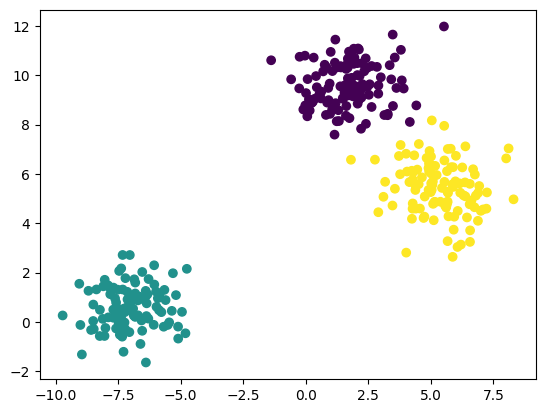

In [21]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [22]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [23]:
## kneelocator
%pip install kneed

ERROR: Could not find a version that satisfies the requirement kneed (from versions: none)
ERROR: No matching distribution found for kneed
Note: you may need to restart the kernel to use updated packages.


In [24]:
from kneed import KneeLocator

ModuleNotFoundError: No module named 'kneed'

In [ ]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [ ]:
kl.elbow

3

In [ ]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

[0.5048928618412506,
 0.7559465812473117,
 0.6172410967356654,
 0.48159087274307594,
 0.3677802717132879,
 0.3570682525559037,
 0.33857051221976525,
 0.32078825756574414,
 0.326145362217004]

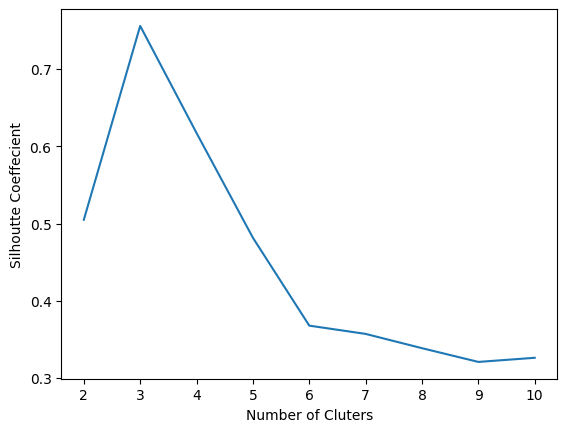

In [ ]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()